In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('heart_disease.csv')

In [3]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [5]:
df.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 4
thal               2
heart_diagnosis    0
dtype: int64

In [6]:
df.ca = df.ca.fillna(df.ca.mean())

In [7]:
df.thal = df.thal.fillna(df.thal.mean())

In [8]:
df.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
heart_diagnosis    0
dtype: int64

In [9]:
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
import seaborn as sns


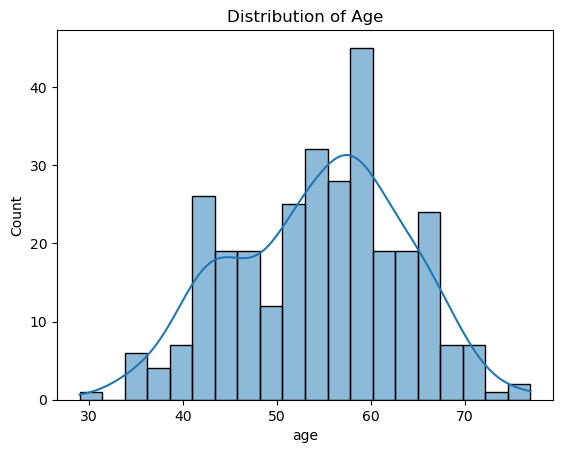

In [11]:
sns.histplot(df['age'], bins=20, kde = True)
plt.title('Distribution of Age')
plt.show()

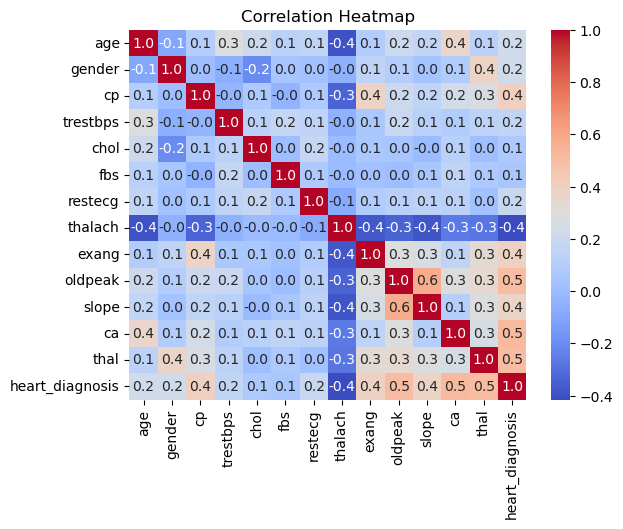

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,annot = True, cmap = 'coolwarm',fmt='.1f')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
x = df.drop(['heart_diagnosis'],axis =1)
y = df['heart_diagnosis']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state= 30)

# Standardize the features (optional but recommended for logistic regression)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_pred = model.predict(x_test)


# model result

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy = accuracy_score(y_test, y_pred)

In [20]:
accuracy

0.6043956043956044

In [21]:
#feature importance
feature_importance = model.coef_

print("Feature Importance (Linear Regression):")
print(dict(zip(x.columns, feature_importance)))

Feature Importance (Linear Regression):
{'age': array([-0.02404848, -0.64700086, -0.47706521, -0.37104625, -0.25400845,
        0.31152012, -0.32509124,  0.1212722 , -0.2966135 , -0.63894495,
       -0.13940878, -0.8921214 , -0.5346351 ]), 'gender': array([ 0.03603952,  0.13835969, -0.10633201,  0.1232089 , -0.06786879,
       -0.32729125, -0.05286579, -0.04289268,  0.1162338 , -0.53219553,
        0.11456983, -0.0440596 , -0.09873115]), 'cp': array([ 0.29678367,  0.28920845,  0.56789299, -0.08948918,  0.31628757,
        0.5289293 , -0.27969358, -0.3380609 , -0.05441764,  0.53146626,
       -0.20485652,  0.10523434,  0.06755478]), 'trestbps': array([-3.52199426e-01, -2.50303426e-01,  1.94736092e-01,  4.38031035e-02,
       -2.32720566e-01,  1.75377821e-01,  4.18182082e-04, -4.59054794e-01,
       -4.83365231e-02, -8.25155162e-03,  3.53571444e-01,  5.16406040e-01,
        5.21108748e-01]), 'chol': array([ 0.04342471,  0.46973614, -0.17923186,  0.29352342,  0.23831023,
       -0.6885359